<a href="https://colab.research.google.com/github/kidais-lab/Mad-Libs-Generator/blob/master/project2_kidais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Gather data**

# 1.1 Problem Statement

This project aims to explore the change in happiness scores and their contributing factors across countries from 2015 to 2016 using the World Happiness Report. By comparing the two datasets, we aim to understand which factors (e.g., GDP, Family, Health, Freedom, etc.) are most associated with changes in happiness scores and which regions saw notable shifts. This analysis could be useful for policymakers and researchers interested in social well-being metrics over time.

**1.2 Gather the  two datasets using two different data gathering methods`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

**Dataset 1**
*   Type: CSV File
*   Method: Manual Download
*   Description: The 2015 World Happiness Report dataset was manually downloaded from Kaggle


In [3]:
df_2015 = pd.read_csv("2015.csv")
print("2015 Dataset loaded. Shape:", df_2015.shape)
df_2015.head()

2015 Dataset loaded. Shape: (158, 12)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

**Dataset 2**
*   Type: CSV File
*   Method: Programmatic Download using KaggleHub API
*   Description: he 2016 World Happiness Report was programmatically retrieved using KaggleHub, simulating automated access to public datasets.

In [4]:
# Set the path to the file
file_path = "2016.csv"
# Load the latest version
df_2016 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "unsdsn/world-happiness",
  file_path,
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
print("2016 Dataset loaded. Shape:", df_2016.shape)
df_2016.head()

<ipython-input-4-c6fd249aef29>:4: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_2016 = kagglehub.load_dataset(


2016 Dataset loaded. Shape: (157, 13)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [8]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

# **2: Assess Data**

# **Data Quality and Tidiness Assessment**

In this analysis, we examine the 2015 and 2016 World Happiness Report datasets for potential data quality and tidiness issues. We use programmatic checks (such as .info(), .isnull(), .duplicated(), etc.) and visualizations (histograms, bar charts) to identify and confirm each issue.
The goal is to document at least two data quality issues and two data tidiness issues for each dataset, with clear justification and evidence.

*Overview of 2015 Data*

In [15]:
df_2015.shape

(158, 12)

In [14]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [29]:
# Check for Missing Values
df_2015.isnull().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


In [28]:
if (df_2015.isnull().sum().any() == 0):
    print("No missing values in 2015 dataset")
else:
    print("Missing values in 2015 dataset")

No missing values in 2015 dataset


*Overview of 2016 Data*

In [16]:
df_2016.shape

(157, 13)

In [17]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [18]:
# Check for Missing Values
df_2016.isnull().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Lower Confidence Interval,0
Upper Confidence Interval,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0


In [31]:
if (df_2016.isnull().sum().any() == 0):
    print("No missing values in 2016 dataset")
else:
    print("Missing values in 2016 dataset")

No missing values in 2016 dataset


The *.info()* summary shows 158 non-null entries for all columns, and i*snull().sum()* confirms zero missing values in each column. Thus, no missing data is present in 2015.

**2015 Data Quality Issues**

1. Duplicate Happiness Rank values (ties in rankings in 2015 data)

In [36]:
duplicate_ranks_2015 = df_2015[df_2015['Happiness Rank'].duplicated(keep=False)]
print(duplicate_ranks_2015[['Country', 'Happiness Rank', 'Happiness Score']])

       Country  Happiness Rank  Happiness Score
81      Jordan              82            5.192
82  Montenegro              82            5.192


The output shows that Jordan and Montenegro both have a rank of 82 with the same happiness score (5.192). This means rank 82 is duplicated, indicating a tie. As a result, the next rank (83) is skipped (no country is ranked 83).

**Justification**: Duplicate ranks indicate ties, leading to missing sequential ranks.

2. Presence of zero values in key numeric columns

In [38]:
factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
           'Freedom', 'Trust (Government Corruption)', 'Generosity']
for col in factors:
    zeros = (df_2015[col] == 0).sum()
    if zeros:
      country = df_2015[df_2015[col] == 0]['Country'].iloc[0]
      print(f"{col}: {zeros} zero value(s), example country: {country}")

Economy (GDP per Capita): 1 zero value(s), example country: Congo (Kinshasa)
Family: 1 zero value(s), example country: Central African Republic
Health (Life Expectancy): 1 zero value(s), example country: Sierra Leone
Freedom: 1 zero value(s), example country: Iraq
Trust (Government Corruption): 1 zero value(s), example country: Indonesia
Generosity: 1 zero value(s), example country: Greece


**Justification:** Zero values may indicate missing or incorrectly recorded data, affecting analysis accuracy.

## **Tidiness Issues (at least 2):**

# Tidiness Issue 1:
*   Data split across two datasets (2015 & 2016) for a single observational unit (countries). Violates: "Each type of observational unit forms a table
##justification: We must merge these two datasets based on a common key (Country)

# Tidiness Issue 2:


*   Unnecessary columns (e.g., Standard Error, Lower/Upper Confidence Interval) in both datasets not needed for analysis
##Justification: Extra columns not relevant to core analysis can reduce dataset readability and efficiency.

# **Step 3: Clean Data**

Make Copies Before Cleaning:

In [39]:
df_2015_clean = df_2015.copy()
df_2016_clean = df_2016.copy()

**Cleaning Quality Issues:**

**Issue 1 (Duplicate Ranks):**
Resolve by assigning unique ranks (e.g., averaging tied ranks).

In [40]:
df_2015_clean['Happiness Rank'] = df_2015_clean['Happiness Score'].rank(ascending=False, method='min')
df_2015_clean['Happiness Rank'] = df_2015_clean['Happiness Rank'].astype(int)
print(df_2015_clean[df_2015_clean['Country'].isin(['Jordan', 'Montenegro'])])

       Country                           Region  Happiness Rank  \
81      Jordan  Middle East and Northern Africa              82   
82  Montenegro       Central and Eastern Europe              82   

    Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
81            5.192         0.04524                   0.90198  1.05392   
82            5.192         0.05235                   0.97438  0.90557   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
81                   0.69639  0.40661                        0.14293   
82                   0.72521  0.18260                        0.14296   

    Generosity  Dystopia Residual  
81     0.11053            1.87996  
82     0.16140            2.10017  


**Issue 2 (Zero Values):**
Investigate zero values and replace with NaN for clarity.

In [41]:
df_2015_clean[factors] = df_2015_clean[factors].replace(0, pd.NA)
print(df_2015_clean.isna().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64


In [45]:
# Identify and review affected rows (countries)
missing_values_rows = df_2015_clean[df_2015_clean[factors].isna().any(axis=1)]
print(missing_values_rows[['Country'] + factors])

                      Country Economy (GDP per Capita)   Family  \
73                  Indonesia                  0.82827  1.08708   
101                    Greece                  1.15406  0.92933   
111                      Iraq                  0.98549  0.81889   
119          Congo (Kinshasa)                     <NA>   1.0012   
122              Sierra Leone                  0.33024  0.95571   
147  Central African Republic                   0.0785     <NA>   

    Health (Life Expectancy)  Freedom Trust (Government Corruption) Generosity  
73                   0.63793  0.46611                          <NA>    0.51535  
101                  0.88213  0.07699                       0.01397       <NA>  
111                  0.60237     <NA>                       0.13788    0.17922  
119                  0.09806  0.22605                       0.07625    0.24834  
122                     <NA>   0.4084                       0.08786    0.21488  
147                  0.06699  0.48879       

In [46]:
# Fill missing values with regional mean
for factor in factors:
  df_2015_clean[factor] = df_2015_clean.groupby('Region')[factor].transform(
  lambda x: x.fillna(x.mean())
  )
print(df_2015_clean.isna().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


<ipython-input-46-cf268c7f1e1c>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mean())
<ipython-input-46-cf268c7f1e1c>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mean())
<ipython-input-46-cf268c7f1e1c>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mean())
<ipython-i

In [47]:
# Verify no more missing values exist after imputation
print(df_2015_clean[factors].isna().sum())

Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


In [48]:
# Identifying rows with missing values after replacing zeros
missing_values_rows = df_2015_clean[df_2015_clean[factors].isna().any(axis=1)]
print("Rows with missing values:\n", missing_values_rows[['Country'] + factors])

# Impute missing values with regional mean for better accuracy
for factor in factors:
  df_2015_clean[factor] = df_2015_clean.groupby('Region')[factor].transform(
  lambda x: x.fillna(x.mean())
  )
# Verify successful cleaning
print("Verification after imputation:\n", df_2015_clean[factors].isna().sum())


Rows with missing values:
 Empty DataFrame
Columns: [Country, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity]
Index: []
Verification after imputation:
 Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


In [42]:
df_2016_clean[factors] = df_2016_clean[factors].replace(0, pd.NA)
print(df_2016_clean.isna().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64


In [49]:
#  Identify and review affected rows (countries)
missing_values_rows = df_2016_clean[df_2016_clean[factors].isna().any(axis=1)]
print(missing_values_rows[['Country'] + factors])

                    Country Economy (GDP per Capita)   Family  \
75                  Somalia                     <NA>  0.33613   
86   Bosnia and Herzegovina                  0.93383  0.64367   
98                   Greece                  1.24886  0.75473   
110            Sierra Leone                  0.36485    0.628   
132                   Sudan                  0.63069  0.81928   
154                    Togo                  0.28123     <NA>   

    Health (Life Expectancy)  Freedom Trust (Government Corruption) Generosity  
75                   0.11466  0.56778                        0.3118    0.27225  
86                   0.70766  0.09511                          <NA>    0.29889  
98                   0.80029  0.05822                       0.04127       <NA>  
110                     <NA>  0.30685                       0.08196    0.23897  
132                  0.29759     <NA>                       0.10039    0.18077  
154                  0.24811  0.34678                     

In [54]:
# Fill missing values with regional mean
for factor in factors:
  df_2016_clean[factor] = df_2016_clean.groupby('Region')[factor].transform(
    lambda x: x.fillna(x.mean())
    )
print(df_2016_clean.isna().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [55]:
# Verify no more missing values exist after imputation
print(df_2015_clean[factors].isna().sum())

Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


In [56]:
# Identifying rows with missing values after replacing zeros
missing_values_rows = df_2016_clean[df_2016_clean[factors].isna().any(axis=1)]
print("Rows with missing values:\n", missing_values_rows[['Country'] + factors])

# Impute missing values with regional mean for better accuracy
for factor in factors:
  df_2016_clean[factor] = df_2016_clean.groupby('Region')[factor].transform(
    lambda x: x.fillna(x.mean())
      )
# Verify successful cleaning
print("Verification after imputation:\n", df_2016_clean[factors].isna().sum())


Rows with missing values:
 Empty DataFrame
Columns: [Country, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity]
Index: []
Verification after imputation:
 Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


**Cleaning Tidiness Issues:**
*   Tidiness Issue 1 (Merging Datasets):
Merge 2015 & 2016 datasets into a single dataframe with a year identifier.

In [57]:
df_2015_clean['Year'] = 2015
df_2016_clean['Year'] = 2016

combined_df = pd.concat([df_2015_clean, df_2016_clean], ignore_index=True)
print(combined_df.head())
print(combined_df.shape)


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

**Tidiness Issue 2**: (Removing Unnecessary Columns):

In [58]:
combined_df.drop(['Standard Error', 'Lower Confidence Interval', 'Upper Confidence Interval'],
                 axis=1, inplace=True, errors='ignore')
print(combined_df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')


In [59]:
# Rename columns to be consistent and clear
combined_df.rename(columns={
 'Economy': 'economy',
 'Region': 'region',
 'Happiness Rank': 'happiness_rankder',
 'Happiness Score': 'happiness_score',
 'Economy (GDP per Capita)': 'economy',
 'Family': 'family',
 'Health (Life Expectancy)': 'health',
 'Trust (Government Corruption)': 'trust',
 'Generosity': 'generosity',
 'Dystopia Residual': 'dystopia_residual',
 'Year': 'year'
}, inplace=True)

# Confirm changes
print(combined_df.columns)

Index(['Country', 'region', 'happiness_rankder', 'happiness_score', 'economy',
       'family', 'health', 'Freedom', 'trust', 'generosity',
       'dystopia_residual', 'year'],
      dtype='object')


In [60]:
combined_df.head()

,Country,region,happiness_rankder,happiness_score,economy,family,health,Freedom,trust,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [61]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            315 non-null    object 
 1   region             315 non-null    object 
 2   happiness_rankder  315 non-null    int64  
 3   happiness_score    315 non-null    float64
 4   economy            315 non-null    float64
 5   family             315 non-null    float64
 6   health             315 non-null    float64
 7   Freedom            315 non-null    float64
 8   trust              315 non-null    float64
 9   generosity         315 non-null    float64
 10  dystopia_residual  315 non-null    float64
 11  year               315 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 29.7+ KB


# **Step 4: Update Data Storage**
Maintain clear file names for datasets:

In [62]:
combined_df.to_csv('cleaned_happiness_data.csv', index=False)
df_2015.to_csv('raw_2015_data.csv', index=False)
df_2016.to_csv('raw_2016_data.csv', index=False)

# **Step 5: Answer the Research Question**
##Research Question:
"What factors (GDP, Family, Health, Freedom, Trust, Generosity) were most strongly associated with the change in happiness scores between 2015 and 2016?

**Visualization 1: Correlation Heatmap**

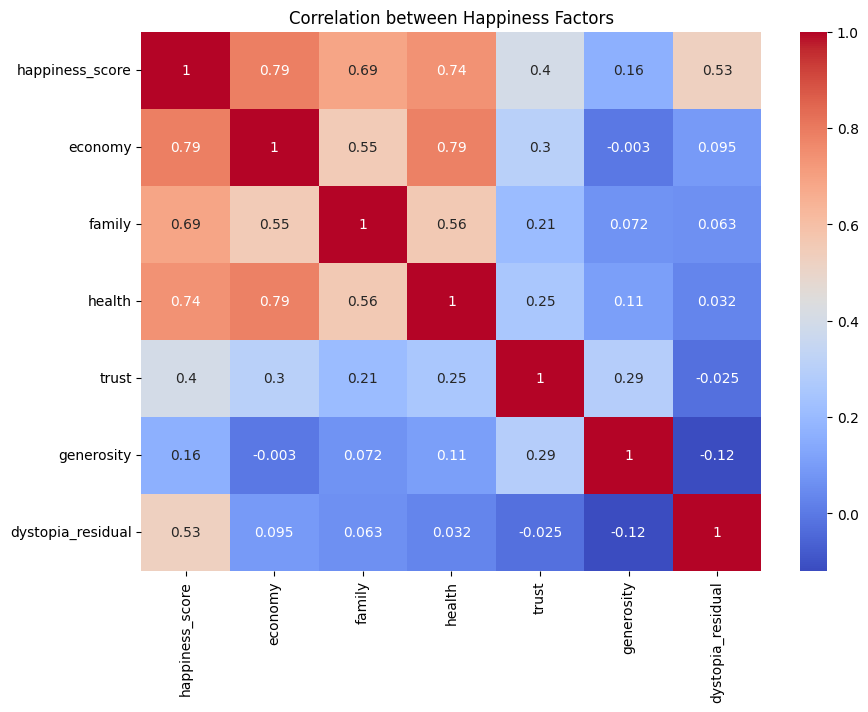

This heatmap illustrates which factors have the strongest correlation with happiness scores.


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
# Updated to use 'trust' which was used in rename operations
sns.heatmap(combined_df[['happiness_score','economy','family','health',
                         'trust','generosity','dystopia_residual']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Happiness Factors')
plt.show()
print("This heatmap illustrates which factors have the strongest correlation with happiness scores.")

**Visualization 2:** Happiness Score Change (2015 vs. 2016) per Region

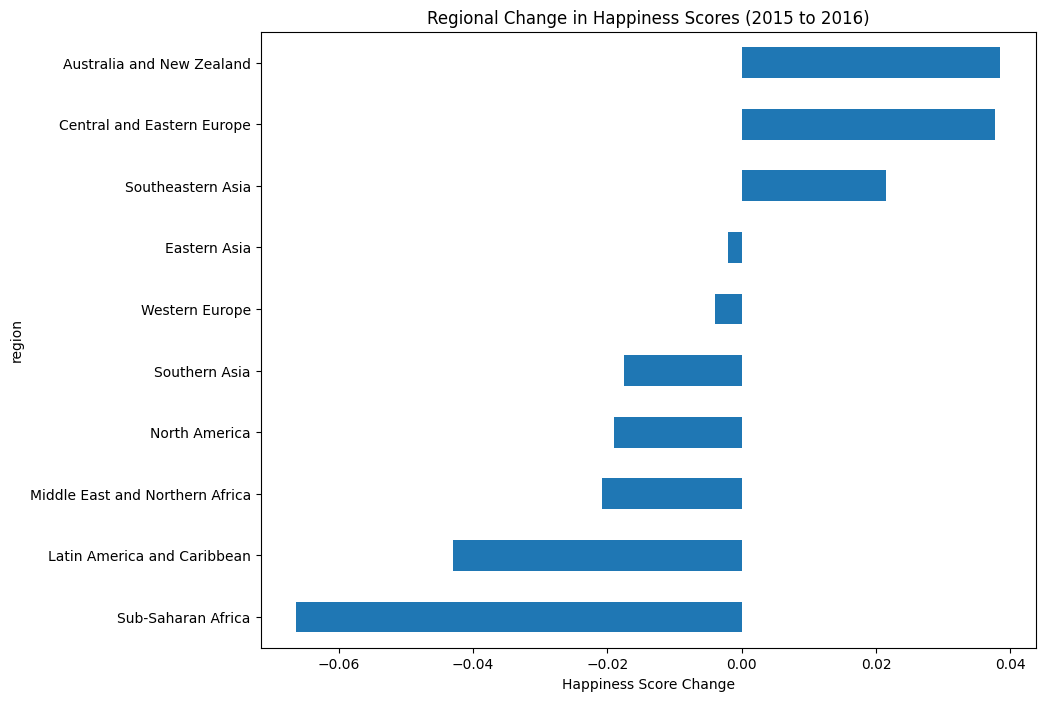

This bar plot identifies regions with significant increases or decreases in happiness.


In [72]:
score_region = combined_df.pivot_table(values='happiness_score', index='region', columns='year')
score_region['Change'] = score_region[2016] - score_region[2015]

score_region['Change'].sort_values().plot(kind='barh', figsize=(10,8))
plt.xlabel('Happiness Score Change')
plt.title('Regional Change in Happiness Scores (2015 to 2016)')
plt.show()
print("This bar plot identifies regions with significant increases or decreases in happiness.")

# **Reflection**
If I had more time and resources, I would further investigate the origin of the zero values in key contributing factors to determine whether they reflect actual conditions or data recording errors. This could involve cross-referencing with external socioeconomic sources. Additionally, I would extend the analysis by exploring country-specific trends in happiness score changes between 2015 and 2016, and experiment with building a regression model to evaluate which factors most strongly predict shifts in happiness across different regions.